In [656]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [657]:
x,y=make_blobs(n_samples=200,centers=4,cluster_std=.6,random_state=0)
#x=np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,.6],[9,11]])
#x=sorted(x , key=lambda k: [k[1], k[0]])
#x=np.array(x)

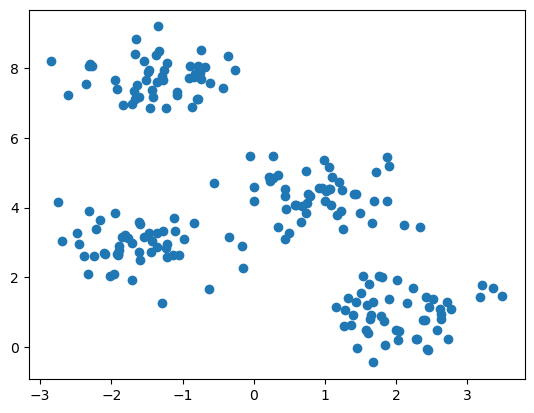

In [658]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [659]:
class K_Medoids:

    def __init__(self,k=4,max_iter=5):
        self.k=k
        self.max_iter=max_iter
        self.medoids=[]

    def score(self,clusters,temp):
        score=0
        for i in range(self.k):
            for point in clusters[i]:
                score+=math.sqrt((point[0]-temp[i][0])**2+(point[1]-temp[i][1])**2)
        return score

    def predict(self,data):
        prections=[]
        for point in data:
            min_distance=sys.maxsize
            min_medoid=0
            for i in range(self.k):
                distance=(point[0]-self.medoids[i][0])**2+(point[1]-self.medoids[i][1])**2
                if(distance<min_distance):
                    min_distance=distance
                    min_medoid=i
            prections.append(min_medoid)
        return prections

    def fit(self,data):
        for i in range(self.k):
            self.medoids.append(data[i])
        for i in range(self.max_iter):
            clusters=[]
            for j in range(self.k):
                clusters.append([])
            for point in data:
                temp=[]
                temp.append(point)
                clusters[self.predict(temp)[0]].append(point)
            for j in range(self.k):
                min_score=sys.maxsize
                min_score_point=[]
                for point in clusters[j]:
                    temp=self.medoids
                    temp[j]=point
                    score_point=self.score(clusters,temp)
                    if(score_point<min_score):
                        min_score=score_point
                        min_score_point=point
                if(min_score_point!=[]):
                    self.medoids[j]=min_score_point
    #        m_list.append(np.array(self.medoids))           
    #    return self.medoids,m_list

In [660]:
"""def score(clusters,medoids,k):
    score=0
    for i in range(k):
        for point in clusters[i]:
            score+=math.sqrt((point[0]-medoids[i][0])**2+(point[1]-medoids[i][1])**2)
    return score"""

'def score(clusters,medoids,k):\n    score=0\n    for i in range(k):\n        for point in clusters[i]:\n            score+=math.sqrt((point[0]-medoids[i][0])**2+(point[1]-medoids[i][1])**2)\n    return score'

In [661]:
"""def predict(data,medoids,k=2):o
    prections=[]
    for point in data:
        min_distance=sys.maxsize
        min_medoid=0
        for i in range(k):
            distance=(point[0]-medoids[i][0])**2+(point[1]-medoids[i][1])**2
            if(distance<min_distance):
                min_distance=distance
                min_medoid=i
        prections.append(min_medoid)
    return prections"""

'def predict(data,medoids,k=2):o\n    prections=[]\n    for point in data:\n        min_distance=sys.maxsize\n        min_medoid=0\n        for i in range(k):\n            distance=(point[0]-medoids[i][0])**2+(point[1]-medoids[i][1])**2\n            if(distance<min_distance):\n                min_distance=distance\n                min_medoid=i\n        prections.append(min_medoid)\n    return prections'

In [662]:
"""def fit(data,k=2,max_iter=5):
    medoids=[]
    m_list=[]
    for i in range(len(data)-k,len(data)):
        medoids.append(data[i])
    print(medoids)
    for i in range(max_iter):
        clusters=[]
        for j in range(k):
            clusters.append([])
        for point in data:
            temp=[]
            temp.append(point)
            clusters[predict(temp,medoids,k)[0]].append(point)
        predictions_=[]
        for j in range(k):
            min_score=sys.maxsize
            min_score_point=[]
            for point in clusters[j]:
                temp=medoids
                temp[j]=point
                score_point=score(clusters,temp,k)
                if(score_point<min_score):
                    min_score=score_point
                    min_score_point=point
            if(min_score_point!=[]):
                medoids[j]=min_score_point
        m_list.append(np.array(medoids))           
    return medoids,m_list"""

'def fit(data,k=2,max_iter=5):\n    medoids=[]\n    m_list=[]\n    for i in range(len(data)-k,len(data)):\n        medoids.append(data[i])\n    print(medoids)\n    for i in range(max_iter):\n        clusters=[]\n        for j in range(k):\n            clusters.append([])\n        for point in data:\n            temp=[]\n            temp.append(point)\n            clusters[predict(temp,medoids,k)[0]].append(point)\n        predictions_=[]\n        for j in range(k):\n            min_score=sys.maxsize\n            min_score_point=[]\n            for point in clusters[j]:\n                temp=medoids\n                temp[j]=point\n                score_point=score(clusters,temp,k)\n                if(score_point<min_score):\n                    min_score=score_point\n                    min_score_point=point\n            if(min_score_point!=[]):\n                medoids[j]=min_score_point\n        m_list.append(np.array(medoids))           \n    return medoids,m_list'

In [663]:
k_medoids=K_Medoids(4,5)

In [664]:
k_medoids.fit(x)

C:\Users\Armaan\AppData\Local\Temp\ipykernel_23272\237502785.py:49: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(min_score_point!=[]):


In [665]:
y=k_medoids.predict(x)
y

[0,
 1,
 2,
 3,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 0,
 2,
 3,
 3,
 3,
 0,
 3,
 1,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 2,
 3,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 0,
 1,
 2,
 3,
 3,
 2,
 3,
 1,
 1,
 3,
 2,
 3,
 1,
 0,
 2,
 0,
 3,
 2,
 0,
 2,
 3,
 2,
 0,
 3,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 3,
 1,
 1,
 0,
 0,
 3,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 3,
 3,
 3,
 2,
 2,
 0,
 1,
 3,
 2,
 2,
 3,
 0,
 0,
 3,
 3,
 1,
 2,
 0,
 0,
 2,
 3,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 3,
 2,
 3,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 3,
 3,
 1,
 3,
 3,
 0,
 3,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 3,
 3,
 3,
 2,
 1,
 0,
 2,
 3,
 1,
 3,
 0,
 3,
 0,
 0,
 1,
 1,
 3,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 3,
 3,
 3,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 3,
 2,
 3,
 0,
 0,
 2,
 3,
 1,
 1,
 1,
 2,
 3,
 0]

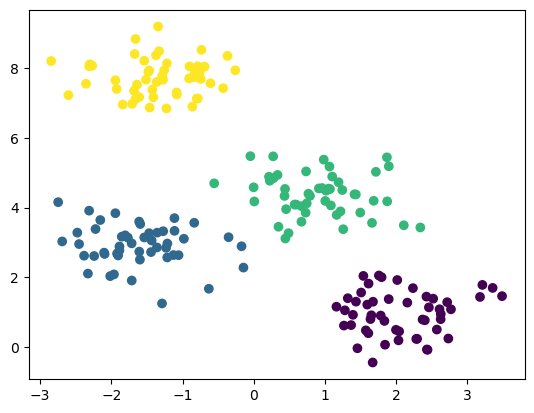

In [666]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()